## Exploratory Data Analysis

In [2]:
import pandas as pd

import numpy as np
import os
import pickle
import boto3
s3 = boto3.resource('s3')
bucket_name = "msds-practicum-carey"


import altair as alt
alt.renderers.enable('notebook')





import matplotlib.pyplot as plt


import re
import spacy
import scattertext as st
#nlp = spacy.load("en_core_web_sm")

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


import nltk
from nltk import FreqDist
from nltk.util import ngrams
import string

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
with open('outdata/tweets_clean_df.pkl', 'wb') as data:
    s3.Bucket(bucket_name).download_fileobj('tweets_clean_df.pkl', data)
    


In [3]:
tweets_clean_df = pd.read_pickle('outdata/tweets_clean_df.pkl')

## Check for Data Imblance



In [4]:
counts = tweets_clean_df.groupby("class").agg(
    count=('class',"count")).reset_index()

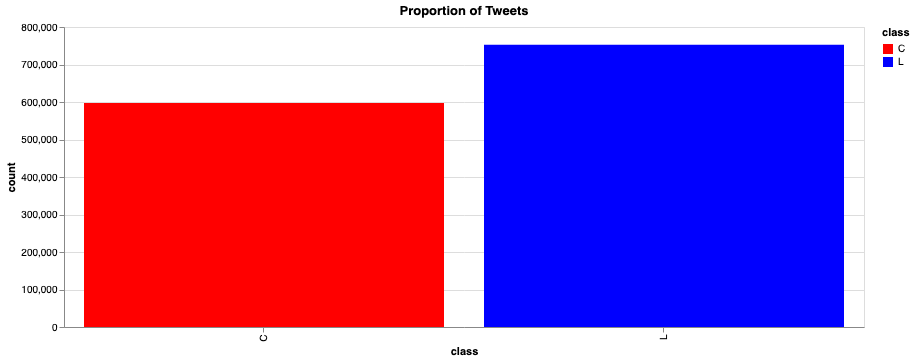

In [5]:
alt.Chart(counts).mark_bar().encode(
    x='class',
    y='count',
    color =
      alt.Color('class',
                scale=\
                alt.Scale(domain=\
                        ['C','L'],
                        range=\
                          ['Red',"Blue"]))
).properties(width =
             800, title=
             "Proportion of Tweets")

In [14]:
lib_tweets = tweets_clean_df[tweets_clean_df['class']=='L']['clean_tweets'].tolist()
con_tweets = tweets_clean_df[tweets_clean_df['class']=='C']['clean_tweets'].tolist()

### Generate Top Word Counts

In [15]:
def generate_bigrams(tweet_list):
    print(f'...Tokenizing List')
    tokens = [list(nltk.word_tokenize(x)) for x in tqdm(tweet_list)]
    print(f'...NLTK make bigrams')
    bigram_list = [list(nltk.bigrams(x)) for x in tqdm(tokens)]
    bigrams = [item for sublist in bigram_list for item in sublist]
    clean_bigram = [i for i in bigrams if i[0] != '-PRON-'if i[1] != '-PRON-']
    print(f'...making Frequency Distribution of Bigrams')
    bigram_freq_dist = nltk.FreqDist(clean_bigram)
    print(f'DONE')
    return bigram_freq_dist

def generate_trigrams(tweet_list):
    print(f'...Tokenizing ')
    tokens = [list(nltk.word_tokenize(x)) for x in tqdm(tweet_list)]
    print(f'...NLTK make Trigrams')
    trigram_list = [list(nltk.trigrams(x)) for x in tqdm(tokens)]
    trigrams = [item for sublist in trigram_list for item in sublist]
    clean_trigram = [i for i in trigrams if i[0] != '-PRON-'if i[1] != '-PRON-' if i[2] != '-PRON-']
    print(f'...making Frequency Distribution of trigrams')
    trigram_freq_dist = nltk.FreqDist(clean_trigram)
    print(f'DONE')
    return trigram_freq_dist

In [16]:
lib_bigram_freq_dist = generate_bigrams(lib_tweets)
con_bigram_freq_dist = generate_bigrams(con_tweets)

...Tokenizing List



...NLTK make bigrams



...making Frequency Distribution of Bigrams
DONE
...Tokenizing List



...NLTK make bigrams



...making Frequency Distribution of Bigrams
DONE


In [17]:
lib_trigram_freq_dist = generate_trigrams(lib_tweets)
con_trigram_freq_dist = generate_trigrams(con_tweets)


...Tokenizing 



...NLTK make Trigrams



...making Frequency Distribution of trigrams
DONE
...Tokenizing 



...NLTK make Trigrams



...making Frequency Distribution of trigrams
DONE


## Comparison of Top Bigrams
    

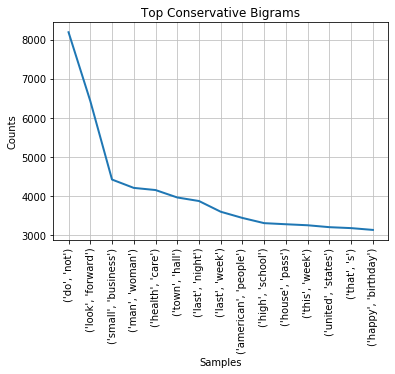

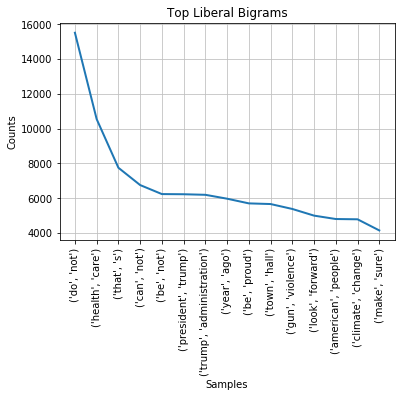

In [18]:

nltk.FreqDist.plot(con_bigram_freq_dist, 15, title="Top Conservative Bigrams")
nltk.FreqDist.plot(lib_bigram_freq_dist, 15, title="Top Liberal Bigrams")

## Comparison of Top Trigrams

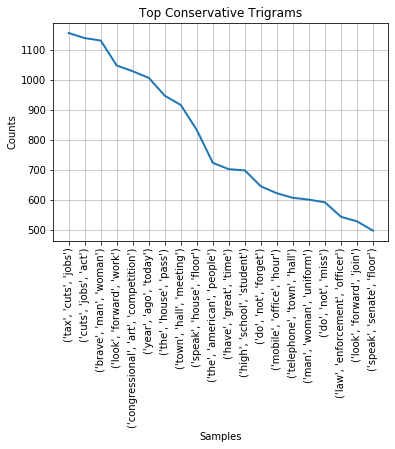

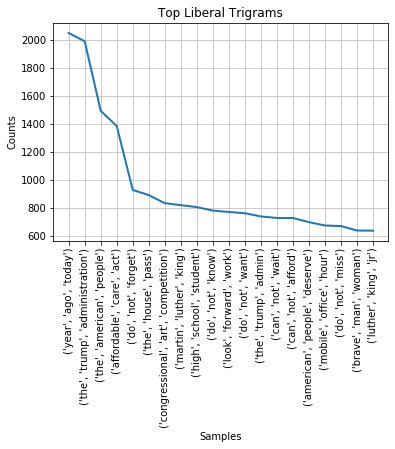

In [19]:
nltk.FreqDist.plot(con_trigram_freq_dist, 20, title="Top Conservative Trigrams")
nltk.FreqDist.plot(lib_trigram_freq_dist, 20, title="Top Liberal Trigrams")